In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score

In [2]:
#TP1

In [3]:
df1 = pd.read_csv('CallsData.csv')
df2 = pd.read_csv('ContractData.csv')

In [4]:
df1

,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code,Phone
0,25,265.1,197.4,244.7,10.0,1,110,45.07,99,16.78,91,11.01,3,2.70,415,382-4657
1,26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,103,11.45,3,3.70,415,371-7191
2,0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.30,104,7.32,5,3.29,415,358-1921
3,0,299.4,61.9,196.9,6.6,2,71,50.90,88,5.26,89,8.86,7,1.78,408,375-9999
4,0,166.7,148.3,186.9,10.1,3,113,28.34,122,12.61,121,8.41,3,2.73,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,156.2,215.5,279.1,9.9,2,77,26.55,126,18.32,83,12.56,6,2.67,415,414-4276
3329,0,231.1,153.4,191.3,9.6,3,57,39.29,55,13.04,123,8.61,4,2.59,415,370-3271
3330,0,180.8,288.8,191.9,14.1,2,109,30.74,58,24.55,91,8.64,6,3.81,510,328-8230
3331,0,213.8,159.6,139.2,5.0,2,105,36.35,84,13.57,137,6.26,10,1.35,510,364-6381


In [5]:
df2

,Account Length,Churn,Int'l Plan,VMail Plan,State,Area Code,Phone
0,128,0,0,1,KS,415,382-4657
1,107,0,0,1,OH,415,371-7191
2,137,0,0,0,NJ,415,358-1921
3,84,0,1,0,OH,408,375-9999
4,75,0,1,0,OK,415,330-6626
...,...,...,...,...,...,...,...
3328,192,0,0,1,AZ,415,414-4276
3329,68,0,0,0,WV,415,370-3271
3330,28,0,0,0,RI,510,328-8230
3331,184,0,1,0,CT,510,364-6381


In [6]:
merged_df = pd.merge(df1, df2, on=['Area Code', 'Phone'])
merged_df

,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,...,Night Charge,Intl Calls,Intl Charge,Area Code,Phone,Account Length,Churn,Int'l Plan,VMail Plan,State
0,25,265.1,197.4,244.7,10.0,1,110,45.07,99,16.78,...,11.01,3,2.70,415,382-4657,128,0,0,1,KS
1,26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,...,11.45,3,3.70,415,371-7191,107,0,0,1,OH
2,0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.30,...,7.32,5,3.29,415,358-1921,137,0,0,0,NJ
3,0,299.4,61.9,196.9,6.6,2,71,50.90,88,5.26,...,8.86,7,1.78,408,375-9999,84,0,1,0,OH
4,0,166.7,148.3,186.9,10.1,3,113,28.34,122,12.61,...,8.41,3,2.73,415,330-6626,75,0,1,0,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,156.2,215.5,279.1,9.9,2,77,26.55,126,18.32,...,12.56,6,2.67,415,414-4276,192,0,0,1,AZ
3329,0,231.1,153.4,191.3,9.6,3,57,39.29,55,13.04,...,8.61,4,2.59,415,370-3271,68,0,0,0,WV
3330,0,180.8,288.8,191.9,14.1,2,109,30.74,58,24.55,...,8.64,6,3.81,510,328-8230,28,0,0,0,RI
3331,0,213.8,159.6,139.2,5.0,2,105,36.35,84,13.57,...,6.26,10,1.35,510,364-6381,184,0,1,0,CT


In [7]:
# Transform Churn attribute
merged_df['Churn'] = merged_df['Churn'].map({0: 'Ficou', 1: 'Deixou'})
merged_df


,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,...,Night Charge,Intl Calls,Intl Charge,Area Code,Phone,Account Length,Churn,Int'l Plan,VMail Plan,State
0,25,265.1,197.4,244.7,10.0,1,110,45.07,99,16.78,...,11.01,3,2.70,415,382-4657,128,Ficou,0,1,KS
1,26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,...,11.45,3,3.70,415,371-7191,107,Ficou,0,1,OH
2,0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.30,...,7.32,5,3.29,415,358-1921,137,Ficou,0,0,NJ
3,0,299.4,61.9,196.9,6.6,2,71,50.90,88,5.26,...,8.86,7,1.78,408,375-9999,84,Ficou,1,0,OH
4,0,166.7,148.3,186.9,10.1,3,113,28.34,122,12.61,...,8.41,3,2.73,415,330-6626,75,Ficou,1,0,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,156.2,215.5,279.1,9.9,2,77,26.55,126,18.32,...,12.56,6,2.67,415,414-4276,192,Ficou,0,1,AZ
3329,0,231.1,153.4,191.3,9.6,3,57,39.29,55,13.04,...,8.61,4,2.59,415,370-3271,68,Ficou,0,0,WV
3330,0,180.8,288.8,191.9,14.1,2,109,30.74,58,24.55,...,8.64,6,3.81,510,328-8230,28,Ficou,0,0,RI
3331,0,213.8,159.6,139.2,5.0,2,105,36.35,84,13.57,...,6.26,10,1.35,510,364-6381,184,Ficou,1,0,CT


In [8]:
#TP2

In [9]:
X = merged_df.drop(['Churn'], axis = 1)  #input features - everything except the Churn feature
y = merged_df['Churn'].to_frame()        #target feature

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=2021)

In [11]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=2021)

In [12]:
X_train = X_train.drop(['Phone', 'VMail Message', 'Account Length', 'State'], axis=1)  
X_test = X_test.drop(['Phone', 'VMail Message', 'Account Length', 'State'], axis=1 )  

In [13]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=2021)

In [14]:
predictions = clf.predict(X_test)
predictions

array(['Ficou', 'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Deixou', 'Deixou',
       'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Deixou', 'Ficou',
       'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Deixou', 'Ficou', 'Ficou',
       'Deixou', 'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Deixou', 'Ficou',
       'Ficou', 'Deixou', 'Ficou', 'Deixou', 'Deixou', 'Ficou', 'Ficou',
       'Deixou', 'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Ficou',
       'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Deixou', 'Ficou',
       'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Ficou',
       'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Deixou', 'Ficou', 'Ficou',
       'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Ficou',
       'Ficou', 'Deixou', 'Deixou', 'Ficou', 'Ficou', 'Ficou', 'Ficou',
       'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Ficou', 'Deixou',
       'Ficou', 'Ficou', 'Ficou', 'Deixou', 'Ficou', 'Ficou', 'Ficou',
       'Ficou', 'Deixou', 'Ficou', 'Ficou', 'Deixou', 'Ficou', 'Ficou',
  

In [15]:
#T3

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

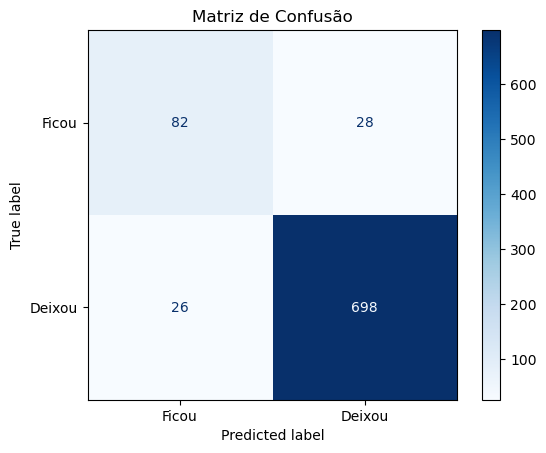

In [17]:
cm= confusion_matrix(y_test, predictions)
# Visualize a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ficou', 'Deixou'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

In [19]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label='Deixou')
recall = recall_score(y_test, predictions, pos_label='Deixou')
f1 = f1_score(y_test, predictions, pos_label='Deixou')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.94
Precision: 0.76
Recall: 0.75
F1 Score: 0.75


In [20]:
#evaluate the model using the metric f1_macro and 10 -fold cross validation :
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')

# Calculando a média das pontuações F1
mean_f1_score = scores.mean()
print(f'Média da pontuação F1 Macro (10-fold CV): {mean_f1_score}')

Média da pontuação F1 Macro (10-fold CV): 0.8520629766246106


In [ ]:
#TP4

In [24]:
X = X.drop(['Phone', 'VMail Message', 'Account Length', 'State'], axis=1)  

clf = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=2021)

scores = cross_val_score(clf,X,y,cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.93253373 0.92953523 0.93403298 0.93993994 0.93393393]
Mean Score: 0.9339951645798722
Standard Deviation: 0.003387397544167028
